In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('automobile_data.csv', usecols=["num-of-cylinders", "horsepower", "price"])

df = df.drop(df[df.price  == '?'].index)

X = df.iloc[:,:-1]
y = df['price'].values.astype(float)

#loop que percorre lista de colunas categóricas que terão valores por categoria convertidas em número 
X = X.astype(str)
novo_valor_numerico = 0
i = 0
for x in X.columns:
    for z in X[x].drop_duplicates():        
        X[x].replace({z: str(i)}, inplace=True)
        i+=1
    i = 0
X = X.astype(int)

X = preprocessing.scale(X)
y = preprocessing.scale(y)

In [3]:
df.columns

Index(['num-of-cylinders', 'horsepower', 'price'], dtype='object')

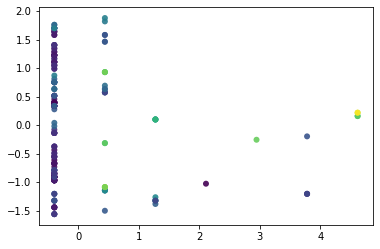

In [4]:
# Plot
plt.scatter(X[:,0], X[:,1], c = y, edgecolors = 'none', alpha = 0.9)
plt.show()

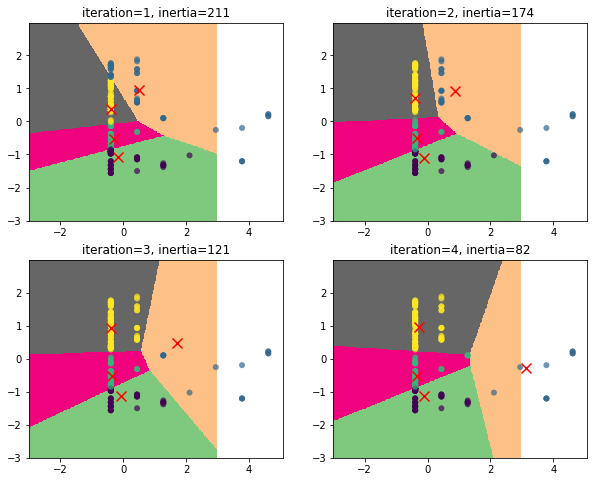

In [5]:
# Gera os clusters e cria o Plot dos Clusters nas Células de Voronoi
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

for n_iter in range(1, 5):

    # Cria o classificador e constrói o modelo com os dados de entrada definidos nas células anteriores
    modelo = KMeans(n_clusters = 4, max_iter = n_iter, n_init = 1, init = 'random', random_state = 101)
    modelo.fit(X)
    
    # Plot
    plt.subplot(2, 2, n_iter)
    h = 0.02
    xx, yy = np.meshgrid(np.arange(-3, 3, h), np.arange(-3, 3, h))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.imshow(Z, 
               interpolation = 'nearest', 
               cmap = plt.cm.Accent,
               extent = (xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto', 
               origin = 'lower')

    # Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
    # Iteration = Número de iterações definido pelo parâmero n_iter definido acima
    plt.scatter(X[:,0], X[:,1], c = modelo.labels_, edgecolors = 'none', alpha = 0.7)
    plt.scatter(modelo.cluster_centers_[:,0],  modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)
    plt.title("iteration=%s, inertia=%s" %(n_iter, int(modelo.inertia_)))

plt.show()

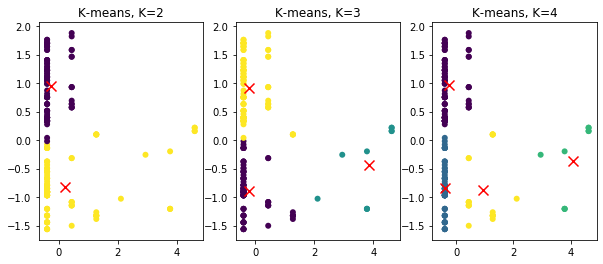

In [6]:
# Diferenças nos clusters de acordo com os valores de K
pylab.rcParams['figure.figsize'] = (10.0, 4.0)

for K in [2, 3, 4]:
    
    # Criando o classificador e construindo o modelo
    modelo = KMeans(n_clusters = K, random_state = 101)
    y_pred = modelo.fit_predict(X)
    
    plt.subplot(1, 3, K-1)
    plt.title("K-means, K=%s" % K)
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, edgecolors = 'none')
    plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

plt.show()

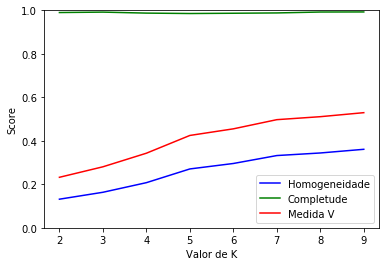

In [7]:
# Checando a homogeneidade dentro do cluster
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

# Lista com os valores de K
valores_k = range(2, 10)

# Lista para receber as métricas
HCVs = []

# Um resultado de cluster satisfaz a homogeneidade se todos os seus clusters contiverem apenas pontos de 
# dados que são membros de uma única classe.

# Um resultado de cluster satisfaz a completude se todos os pontos de dados que são membros 
# de uma determinada classe são elementos do mesmo cluster.

# Ambas as pontuações têm valores positivos entre 0,0 e 1,0, sendo desejáveis valores maiores.

# Medida V é a média entre homogeneidade e completude.

for K in valores_k:
    
    # Criando o classificador e fazendo previsões sobre o cluster para cada ponto de dados
    y_pred = KMeans(n_clusters = K, random_state = 101).fit_predict(X)
    
    # Calculando as métricas
    HCVs.append(homogeneity_completeness_v_measure(y, y_pred))

plt.plot(valores_k, [el[0] for el in HCVs], 'b', label = 'Homogeneidade')
plt.plot(valores_k, [el[1] for el in HCVs], 'g', label = 'Completude')
plt.plot(valores_k, [el[2] for el in HCVs], 'r', label = 'Medida V')
plt.ylim([0, 1])
plt.xlabel("Valor de K")
plt.ylabel("Score")
plt.legend(loc = 4)
plt.show()

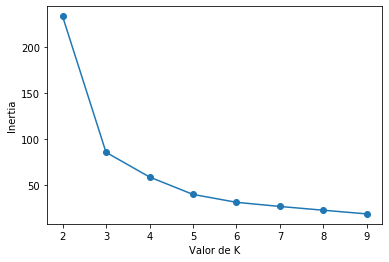

In [8]:
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.

# Lista de valores de K
Ks = range(2, 10)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(X)
    valores_metrica.append(modelo.inertia_)

plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()

# Outro modelo KMeans com PCA

In [19]:
df = pd.read_csv('automobile_data.csv')

df = df.drop(df[df.price  == '?'].index)

X = df.iloc[:,:-1]
y = df['price'].values.astype(float)

#loop que percorre lista de colunas categóricas que terão valores por categoria convertidas em número 
X = X.astype(str)
novo_valor_numerico = 0
i = 0
for x in X.columns:
    for z in X[x].drop_duplicates():        
        X[x].replace({z: str(i)}, inplace=True)
        i+=1
    i = 0
X = X.astype(int)

In [20]:
# Criando outro modelo
kmeans = KMeans(n_clusters = 3, random_state = 111)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [22]:
# Criando o Cluster Map
cluster_map = pd.DataFrame(X)
cluster_map['cluster'] = kmeans.labels_

In [23]:
cluster_map

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,cluster
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,1,...,1,0,1,1,0,1,0,1,1,1
3,2,1,1,0,0,1,2,1,0,2,...,2,0,2,2,1,2,1,2,2,1
4,2,1,1,0,0,1,2,2,0,3,...,3,0,2,2,2,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,51,21,0,0,1,2,0,0,51,...,40,0,24,16,6,55,4,5,7,2
201,4,51,21,0,1,1,2,0,0,51,...,40,0,24,16,26,37,22,1,4,2
202,4,51,21,0,0,1,2,0,0,51,...,41,0,21,36,5,57,1,3,20,2
203,4,51,21,1,1,1,2,0,0,51,...,42,6,38,2,31,58,6,18,0,2


In [24]:
# Filtrando os Dados Pelo Cluster
cluster_map[cluster_map.cluster == 2]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,cluster
139,2,39,18,0,0,0,1,1,0,9,...,5,1,6,32,26,44,20,18,19,2
142,3,40,18,0,0,1,2,1,0,31,...,5,1,6,32,6,45,20,23,24,2
143,3,40,18,0,0,1,2,1,0,31,...,5,0,6,32,0,46,13,18,21,2
145,3,40,18,0,1,1,2,2,0,42,...,5,0,6,32,29,0,6,2,6,2
146,3,41,18,0,0,1,3,1,0,42,...,5,1,6,32,0,45,6,23,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,51,21,0,0,1,2,0,0,51,...,40,0,24,16,6,55,4,5,7,2
201,4,51,21,0,1,1,2,0,0,51,...,40,0,24,16,26,37,22,1,4,2
202,4,51,21,0,0,1,2,0,0,51,...,41,0,21,36,5,57,1,3,20,2
203,4,51,21,1,1,1,2,0,0,51,...,42,6,38,2,31,58,6,18,0,2


In [25]:
# Reduzindo a dimensionalidade
pca = PCA(n_components = 2).fit(X)

In [26]:
# Aplicando o PCA
pca_2d = pca.transform(X)

In [27]:
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,cluster
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,1,...,1,0,1,1,0,1,0,1,1,1
3,2,1,1,0,0,1,2,1,0,2,...,2,0,2,2,1,2,1,2,2,1
4,2,1,1,0,0,1,2,2,0,3,...,3,0,2,2,2,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,51,21,0,0,1,2,0,0,51,...,40,0,24,16,6,55,4,5,7,2
201,4,51,21,0,1,1,2,0,0,51,...,40,0,24,16,26,37,22,1,4,2
202,4,51,21,0,0,1,2,0,0,51,...,41,0,21,36,5,57,1,3,20,2
203,4,51,21,1,1,1,2,0,0,51,...,42,6,38,2,31,58,6,18,0,2


In [28]:
pca_2d

array([[-106.36391002,   18.42714272],
       [-106.36391002,   18.42714272],
       [-104.27698577,   16.51136659],
       [-101.76805886,   14.63608015],
       [-100.22754542,   13.48385046],
       [ -98.98956071,   12.30106541],
       [ -96.74572586,   11.9583777 ],
       [ -96.2998614 ,   11.71007843],
       [ -94.49809316,   11.09170049],
       [ -92.45736708,   10.80495407],
       [ -92.44921224,   10.78250078],
       [ -91.28334251,   10.39301127],
       [ -90.45603601,   10.67930915],
       [ -89.47477181,    9.03826515],
       [ -88.05145651,    7.59084868],
       [ -86.53773851,    6.75194232],
       [ -84.84953736,    6.19031767],
       [ -81.39835956,    4.88340354],
       [ -80.96344345,    4.92571335],
       [ -79.57617695,    5.43300506],
       [ -75.71898227,    2.76570325],
       [ -75.62877329,    2.68603576],
       [ -77.16976262,    5.7505304 ],
       [ -73.6673834 ,    3.13225686],
       [ -72.83873383,    3.41048928],
       [ -72.83873383,   

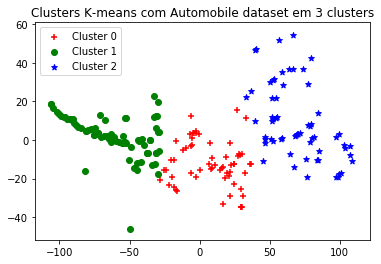

In [32]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='r', marker = '+')
        
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='g', marker = 'o')

    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        pl.legend([c1, c2, c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
        pl.title('Clusters K-means com Automobile dataset em 3 clusters')
pl.show()